In [4]:
from dog_vector import DogVector
import torch
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.calc_sim import get_cos_sim

In [5]:
# Notebookの場合のみ
# Scriptで実行する再は下記の行は不要
os.environ["CUDA_VISIBLE_DEVICES"]='6'

In [ ]:
max_files_n = 100
dogs_dir = './input/individual_dogs'
dogs_path_list = [os.path.join(dogs_dir, fname) for fname in os.listdir(dogs_dir)][:max_files_n]

In [14]:
dogvec = DogVector(img_path_list=dogs_path_list)
vec_dict = dogvec.get_vector()

Using device : cuda


100%|██████████| 4/4 [00:07<00:00,  1.81s/it]


In [15]:
def get_cos_sim(v1, v2):
    v1 = np.array(v1)
    v2 = np.array(v2)
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [16]:
def calc_cos_sim(vec_dict, target_path=''):
    cos_sim_dict = {}
    for path in list(vec_dict.keys()):
        vec = vec_dict[path]
        target_vec = vec_dict[target_path]
        cos_sim = get_cos_sim(v1=vec, v2=target_vec)
        cos_sim_dict.setdefault(path, cos_sim)
    return cos_sim_dict

target_path='./input/individual_dogs/6_2.jpg'
cos_sim_dict = calc_cos_sim(vec_dict=vec_dict, target_path=target_path)

In [17]:
cos_sim_df = pd.DataFrame(columns=['path', 'sim'])
cos_sim_df['path'] = list(cos_sim_dict.keys())
cos_sim_df['sim'] = list(cos_sim_dict.values())
cos_sim_df['category'] = cos_sim_df.path.map(lambda x: str(x.split('/')[-1].split('_')[0]))

Target category:6


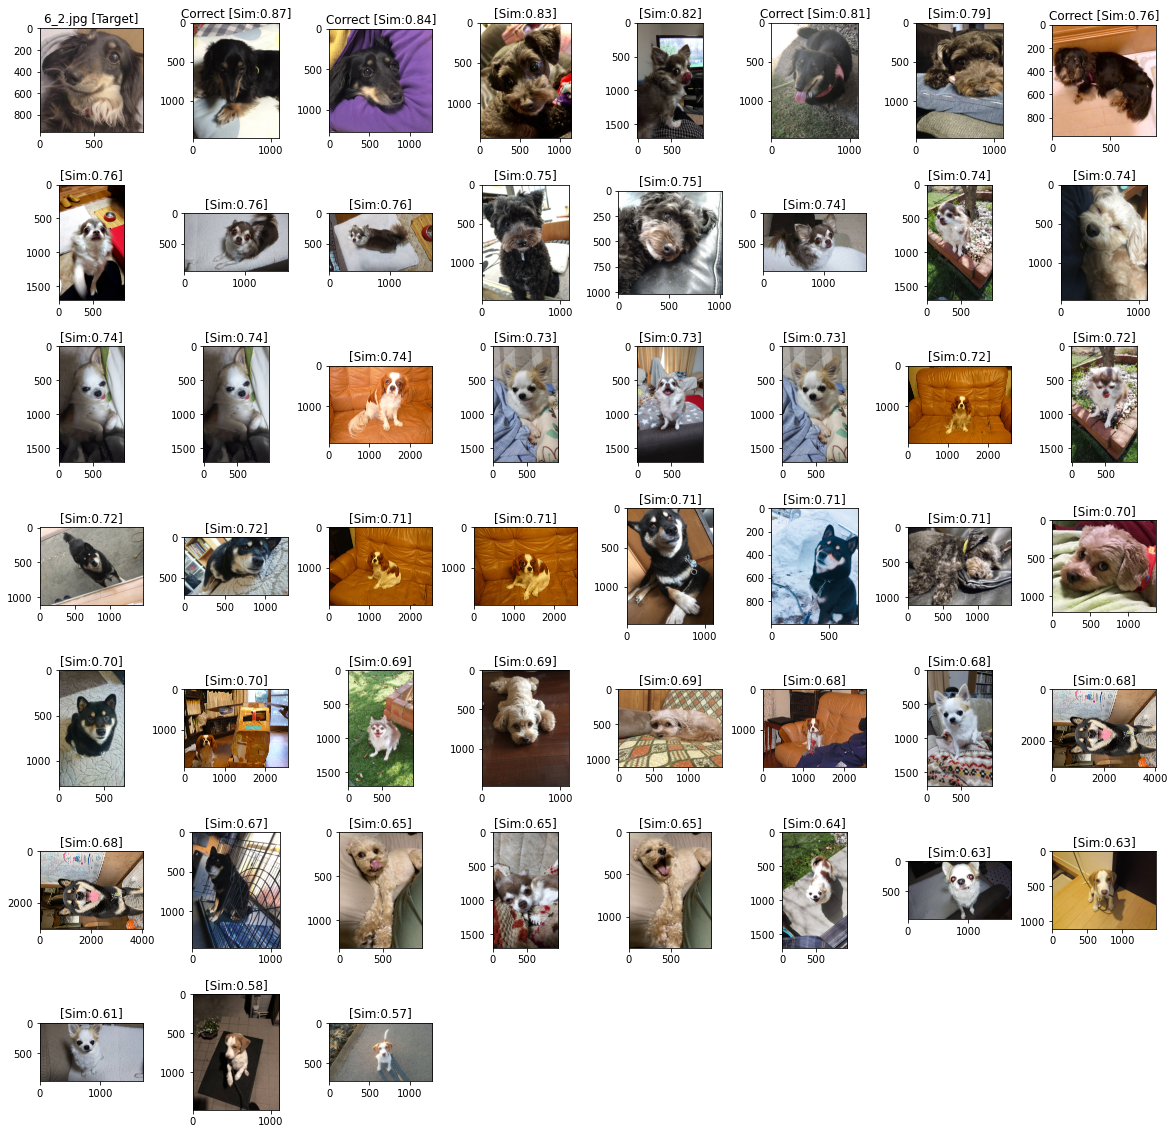

In [18]:
def plot_images_labels(df, max=64):
    df = df.sort_values('sim', ascending=False).reset_index(drop=True)[:max]
    img_n = len(df)
    r = int(np.sqrt(img_n))
    c = (img_n // r) + 1
    fig=plt.figure(figsize=(20, 20))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    target_category = df.loc[0, 'category']
    print(f"Target category:{target_category}")
    for i in range(img_n):
        correct_category = df.loc[i, 'category']
        ax = fig.add_subplot(r, c, i+1)

        # Title
        path = df.loc[df.index==i, 'path'].values[0]
        fname = path.split('/')[-1]
        sim = df.loc[df.index==i, 'sim'].values[0]
        if i == 0:
            title = f"{fname} [Target]"
        elif target_category == correct_category:
            title = f"Correct [Sim:{sim:.2f}]"
        else:
            title = f"[Sim:{sim:.2f}]"
        ax.set_title(title)        
        # Images
        img = Image.open(path)
        ax.imshow(img)
    fig.savefig(os.path.join('./plot', fname))

plot_images_labels(df=cos_sim_df)